In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import os
import pandas as pd

%matplotlib inline

In [2]:
sparql = SPARQLWrapper("http://localhost:8080/blazegraph-2.1.4/namespace/Regellinks/sparql")

In [3]:
def sparql_result_to_df(result):
    cols = result['head']['vars']
    rows_dicts = result['results']['bindings']
    rows = [{c: r.get(c, {'value': None})['value'] for c in cols} for r in rows_dicts]
    return pd.DataFrame(rows)[cols]

In [6]:
queryString = """
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    select ?type (count(?s) as ?count)
    {
        ?s rdf:type ?type.
    }
    group by ?type
    order by desc(?count)
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
sparql_result_to_df(result)

,type,count
0,http://linkeddata.overheid.nl/terms/LinkAct,4821086
1,http://linkeddata.overheid.nl/terms/Jurisprude...,2410559
2,http://linkeddata.overheid.nl/terms/OfficieleO...,1457297
3,http://linkeddata.overheid.nl/terms/Artikel,597946
4,http://linkeddata.overheid.nl/terms/EU-Regelge...,214766
5,http://linkeddata.overheid.nl/terms/Paragraaf,42849
6,http://linkeddata.overheid.nl/terms/Ministerie...,36232
7,http://linkeddata.overheid.nl/terms/Uitvoering...,32912
8,http://linkeddata.overheid.nl/terms/Hoofdstuk,26791
9,http://linkeddata.overheid.nl/terms/Bijlage,24271


In [4]:
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    select ?type (count(?s) as ?count)
    {
        ?s dcterm:type ?type.
    }
    group by ?type
    order by desc(?count)
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
sparql_result_to_df(result)

,type,count
0,Uitspraak,2339824
1,Gemeenteblad,624637
2,Artikel,597946
3,Staatscourant,417883
4,Kamerstuk,247492
5,EU-Afgeleide wetgeving,202931
6,EU-Verordeningen,147149
7,Conclusie,70437
8,Kamervragen (Aanhangsel),60364
9,Waterschapsblad,44611


In [8]:
# wich attributes can appear multiple times?
queryString = """
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    select ?p (count(?o) as ?count) 
    {
        ?s rdf:type <http://linkeddata.overheid.nl/terms/Jurisprudentie>.
        ?s ?p ?o.
    }
    group by ?p
    having(count(?o)>1)
    order by ?p
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
sparql_result_to_df(result)

,p,count
0,http://linkeddata.overheid.nl/lx/creator,2386256
1,http://linkeddata.overheid.nl/lx/date,443563
2,http://linkeddata.overheid.nl/lx/hasVersion,616472
3,http://linkeddata.overheid.nl/lx/heeftZaaknummer,2429190
4,http://linkeddata.overheid.nl/terms/geimportee...,3948219
5,http://linkeddata.overheid.nl/terms/heeftBron,2459164
6,http://linkeddata.overheid.nl/terms/heeftProce...,513403
7,http://linkeddata.overheid.nl/terms/heeftRecht...,2150694
8,http://linkeddata.overheid.nl/terms/heeftUitsp...,2410548
9,http://linkeddata.overheid.nl/terms/heeftZaakn...,2456644


## Legislation

In [12]:
# Legislation titles
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    select ?article ?title 
    {
        ?article rdf:type <http://linkeddata.overheid.nl/terms/Wet>.
        ?article dcterm:title ?title
    }
    limit 100
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
law_titles = sparql_result_to_df(result)
law_titles #.sort_values('cnt', ascending=False)

,article,title
0,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Marinescheepsongevallenwet
1,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Natuurschoonwet 1928
2,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Ziektewet
3,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Opiumwet
4,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Natuurschoonwet 1928
5,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Opiumwet
6,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Natuurschoonwet 1928
7,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Ziektewet
8,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Opiumwet
9,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Faillissementswet


In [13]:
# Legislation titles
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    select ?article ?title (count(*) as ?cnt)
    {
        ?article rdf:type <http://linkeddata.overheid.nl/terms/Wet>.
        ?link_id overheidrl:heeftLinktype ?link_type.
        ?link_id overheidrl:linktNaar  ?article.
        ?link_type rdfs:label ?link_type_label.
        ?article dcterm:title ?title
    }
    group by ?article ?title
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
law_titles = sparql_result_to_df(result)
law_titles.sort_values('cnt', ascending=False)

,article,title,cnt
3845,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Algemene wet bestuursrecht,997
5297,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Algemene wet bestuursrecht,994
5858,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Wet structuur uitvoeringsorganisatie werk en i...,99
4089,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Financiële-verhoudingswet,99
1945,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Werkloosheidswet,99
1270,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Wet op de vennootschapsbelasting 1969,99
3767,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Flora- en faunawet,99
8106,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 2,982
6691,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Invoeringswet Wet ruimtelijke ordening,98
3110,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Wetboek van Burgerlijke Rechtsvordering (geldt...,98


In [18]:
# Link types
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    select ?link_type (count(*) as ?cnt)
    {
        ?link_id overheidrl:heeftLinktype ?link_type.
    }
    group by ?link_type
    order by desc(?cnt)
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
link_titles = sparql_result_to_df(result)
link_titles.head(30)

,link_type,cnt
0,http://linkeddata.overheid.nl/terms/linktype/i...,2713718
1,http://linkeddata.overheid.nl/terms/linktype/i...,665719
2,http://linkeddata.overheid.nl/terms/linktype/i...,623253
3,http://linkeddata.overheid.nl/terms/linktype/i...,621937
4,http://linkeddata.overheid.nl/terms/linktype/i...,272176
5,http://linkeddata.overheid.nl/terms/linktype/i...,119771
6,http://linkeddata.overheid.nl/terms/linktype/i...,66514
7,http://linkeddata.overheid.nl/terms/linktype/i...,51647
8,http://linkeddata.overheid.nl/terms/linktype/i...,51566
9,http://linkeddata.overheid.nl/terms/linktype/i...,24006


In [21]:
for l in link_titles.head(20)['link_type']:
    print(l)

http://linkeddata.overheid.nl/terms/linktype/id/lx-referentie
http://linkeddata.overheid.nl/terms/linktype/id/bwb-externe-referentie
http://linkeddata.overheid.nl/terms/linktype/id/bwb-inwerkingtredingsbron
http://linkeddata.overheid.nl/terms/linktype/id/bwb-ontstaansbron
http://linkeddata.overheid.nl/terms/linktype/id/rvr-referentie
http://linkeddata.overheid.nl/terms/linktype/id/hudoc-referentie
http://linkeddata.overheid.nl/terms/linktype/id/puc-opendata-referentie
http://linkeddata.overheid.nl/terms/linktype/id/rvr-conclusie-latereaanleg
http://linkeddata.overheid.nl/terms/linktype/id/rvr-conclusie-eerdereaanleg
http://linkeddata.overheid.nl/terms/linktype/id/rvr-hogerberoep-eerdereaanleg
http://linkeddata.overheid.nl/terms/linktype/id/rvr-hogerberoep-latereaanleg
http://linkeddata.overheid.nl/terms/linktype/id/rvr-cassatie-eerdereaanleg
http://linkeddata.overheid.nl/terms/linktype/id/rvr-cassatie-latereaanleg
http://linkeddata.overheid.nl/terms/linktype/id/rvr-conclusievoorcassati

In [22]:
# Link types
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
    select ?sourceType ?targetType (count(*) as ?cnt)
    {
        ?target rdf:type ?targetType.
        ?source rdf:type ?sourceType.
        ?link_id overheidrl:heeftLinktype <http://linkeddata.overheid.nl/terms/linktype/id/lx-referentie>.
        ?link_id overheidrl:linktNaar  ?target.
        ?link_id overheidrl:linktVan ?source
    }
    group by ?sourceType ?targetType
    order by desc(?cnt)
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
link_types = sparql_result_to_df(result)
link_types

,sourceType,targetType,cnt
0,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Artikel,1539556
1,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Jurisprude...,537083
2,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Wet,391935
3,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Amvb,66794
4,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/OfficieleO...,56360
5,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/EU-Regelge...,36309
6,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Verdrag,30001
7,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Ministerie...,17952
8,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Afdeling,9742
9,http://linkeddata.overheid.nl/terms/Jurisprude...,http://linkeddata.overheid.nl/terms/Hoofdstuk,5429


In [23]:
link_types.to_csv('link_types.csv')

In [ ]:
# Legislation references
# Links between cases
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    select ?link_id ?source ?article ?link_type ?link_type_label  ?title
    {
        ?source dcterm:type "Jurisprudentie".
        ?article dcterm:type "Wet".
        ?link_id overheidrl:heeftLinktype ?link_type.
        ?link_id overheidrl:linktVan  ?source.
        ?link_id overheidrl:linktNaar  ?article.
        ?link_type rdfs:label ?link_type_label.
        optional {?article dcterm:title ?title}
    }
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
legislation = sparql_result_to_df(result)
legislation.shape

In [ ]:
legislation['title'].value_counts().head(20)

In [ ]:
legislation.to_csv(os.path.join(outpath, 'hr_simple_legislation_links.csv'), index=False)

In [ ]:
# Legislation network
# Connections between legislation through common case
queryString = """
    prefix dcterm: <http://purl.org/dc/terms/> 
    prefix overheidrl: <http://linkeddata.overheid.nl/terms/>
    select ?article1 ?article2 ?title1 ?title2 (count(distinct ?source) as ?cnt)
    {
        ?source dcterm:type "Jurisprudentie".
        ?article1 dcterm:type "Wet".
        ?article2 dcterm:type "Wet".
        ?link_id1 overheidrl:linktVan  ?source.
        ?link_id1 overheidrl:linktNaar  ?article1.
        optional {?article1 dcterm:title ?title1}
        ?link_id2 overheidrl:linktVan  ?source.
        ?link_id2 overheidrl:linktNaar  ?article2.
        optional {?article1 dcterm:title ?title2}
    }
    group by ?article1 ?article2 ?title1 ?title2
"""

sparql.setQuery(queryString)
sparql.setReturnFormat(JSON)
ret = sparql.query()
result = ret.convert()
legislation_network = sparql_result_to_df(result)
legislation_network.shape

In [63]:
legislation_network['cnt'] = legislation_network['cnt'].astype('int')

In [81]:
# Filter self loops 
legislation_network = legislation_network[~(legislation_network['article1']==legislation_network['article2'])]

In [89]:
legislation_network.head()

,article1,article2,title1,title2,cnt
0,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,2
1,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,2
3,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,1
4,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,2
5,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,http://linkeddata.overheid.nl/terms/bwb/id/BWB...,Burgerlijk Wetboek Boek 3,Burgerlijk Wetboek Boek 3,1


In [82]:
legislation_network_grouped = legislation_network.groupby(['article1', 'article2'])['cnt'].sum()

In [93]:
legislation_network_matrix = legislation_network_grouped.unstack(fill_value=0)

In [94]:
legislation_network_matrix.shape

(11707, 11707)

In [95]:
import numpy as np
m = legislation_network_matrix.as_matrix()
m

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [70]:
np.all(m==m.T)

False

In [96]:
np.sum(m != m.T)

1898

In [30]:
outpath = '/media/sf_VBox_Shared/networks/caselaw/'

In [97]:
legislation_network_grouped.to_csv(os.path.join(outpath, 'legislation_links.csv'), 
                                   index=True, index_label=['source', 'target'], header='True')

In [116]:
# Now group by name 
legislation_network_grouped_name = legislation_network.groupby(['title1', 'title2'])['cnt'].sum()
legislation_network_grouped_name.shape

(7129,)

In [117]:
# Remove self-loops
legislation_network_grouped_name = legislation_network_grouped_name[legislation_network_grouped_name.index[
    [s!=t for (s,t) in legislation_network_grouped_name.index]]]

In [118]:
print(legislation_network_grouped_name.shape)
legislation_network_grouped_name.sort_values(ascending=False).head()

(30,)


title1                                                                                          title2                                                                                        
Wetboek van Burgerlijke Rechtsvordering, Artikel 843a                                           Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 843a    237
Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 843a  Wetboek van Burgerlijke Rechtsvordering, Artikel 843a                                             237
Wetboek van Burgerlijke Rechtsvordering, Artikel 401a                                           Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 401a    229
Wetboek van Burgerlijke Rechtsvordering (geldt in geval van digitaal procederen), Artikel 401a  Wetboek van Burgerlijke Rechtsvordering, Artikel 401a                                             229
Wetboek van Burge

In [120]:
legislation_network_grouped_name.to_csv(os.path.join(outpath, 'legislation_titles_links.csv'), 
                                   index=True, index_label=['source', 'target'], header='True', sep='\t')

In [32]:
law_titles.to_csv(os.path.join(outpath, 'legislation_nodes.csv'), index=False)

In [111]:
law_titles.shape, legislation_network_grouped.shape, legislation_network_grouped_name.shape

((11895, 3), (216232,), (30,))

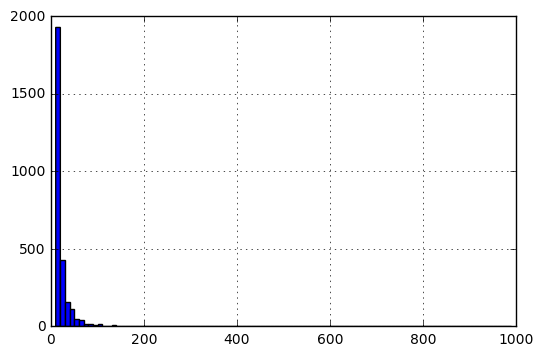

In [99]:
legislation_network_grouped.hist(bins=range(10, 1000, 10))

In [100]:
legislation_network_grouped.sort_values(ascending=False).head()

article1                                                                              article2                                                                            
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2015-11-17/2015-11-17  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2016-08-11/2016-08-11    1325
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2016-08-11/2016-08-11  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001903/3010844/2015-11-17/2015-11-17    1325
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-04-20/2016-04-20  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-07-01/2016-07-01     866
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-07-01/2016-07-01  http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001854/2970494/2016-04-20/2016-04-20     866
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001830/2637694/2002-01-01/2002-01-01  http://linkeddata.overheid.

In [101]:
legislation_network_grouped_10 = legislation_network_grouped[legislation_network_grouped>10]
print(legislation_network_grouped_10.shape)
legislation_network_grouped_10.to_csv(os.path.join(outpath, 'legislation_links_10plus.csv'), 
                                   index=True, index_label=['source', 'target'], header='True')

(2436,)


## Filter cases based on legislation

In [ ]:
# Filter cases on 81 RO - maybe not because can still contain references
ref81ro = legislation[legislation['title']=='Wet op de rechterlijke organisatie, Artikel 81']
cases_filtered = cases[~cases.id.isin(ref81ro['source'].unique())]
cases_filtered.shape